max = 205.0
A = 35.0
B = 45.0


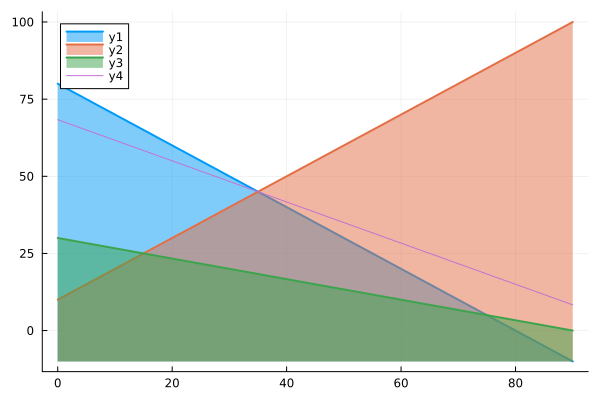

In [59]:
using JuMP, Plots, GLPK

m = Model(GLPK.Optimizer)

#variable, objective, constraint

@variable(m, 0 <= A)
@variable(m, 0 <= B)

@objective(m, Max, 2A +3B)

@constraint(m,constraint1, 5A + 5B <= 400 )

@constraint(m,constraint2, -A + B <= 10)

@constraint(m,constraint3, 90 <= A + 3B)

print(m)

JuMP.optimize!(m)

k =JuMP.optimize!(m)


println("max = ", objective_value(m))
    
println("A = ", JuMP.value(A))
    
println("B = ", JuMP.value(B))
    
A = 0:90
C1(A) = -A+ 80
C2(A) = A +10
C3(A) = -(1/3)*A + 30
M(A) = -(2/3)*A + 205.0/3

feasible = min(C1(A[end]),C2(A[end]),C3(A[end]))
plot(A,C1,fill = (feasible, 0.5, :auto),lw=2)
plot!(A,C2,fill = (feasible, 0.5, :auto),lw=2)        
plot!(A,C3,fill = (feasible, 0.5, :auto),lw=2)

plot!(A,M)